In [206]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import TwoQubitBasisDecomposer
import numpy as np

pi = np.pi


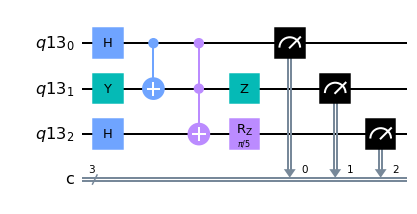

In [207]:
#Problem Circuit
c = ClassicalRegister(3,'c')
q = QuantumRegister(3,'q13')
qc= QuantumCircuit(q,c)
qc.h([q[0],q[2]])
qc.y([q[1]])
qc.cx(q[0],q[1])
qc.ccx(q[0],q[1],q[2])
qc.z([q[1]])
qc.rz(pi/5,q[2])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
qc.draw(output='mpl')


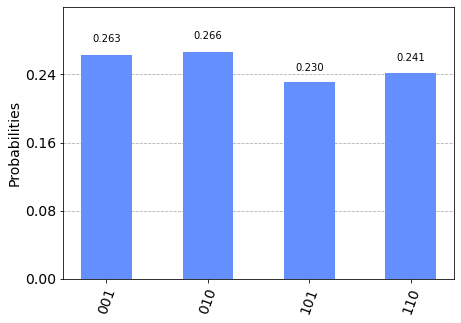

In [208]:
backend_plot = Aer.get_backend('qasm_simulator')
results = execute(qc, backend = backend_plot, shots = 1024).result()
plot_histogram(results.get_counts())

In [209]:
results.get_counts()

{'001': 269, '010': 272, '110': 247, '101': 236}

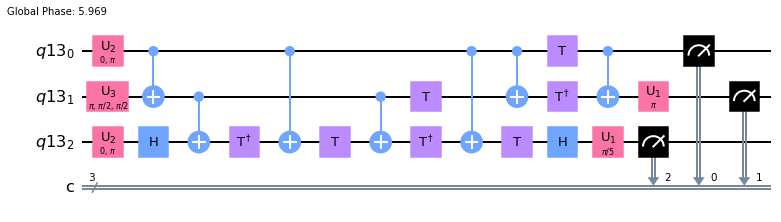

In [210]:
#Decomposing the problem Circuit
qc.decompose().draw(output='mpl')

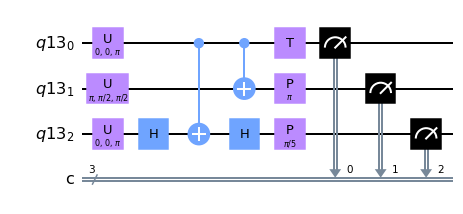

In [211]:
#Thus now, the decomposed and reduced circuit is,
c = ClassicalRegister(3,'c')
q = QuantumRegister(3,'q13')
qc= QuantumCircuit(q,c)
qc.u(0,0,pi,q[0])
qc.u(pi,pi/2,pi/2,q[1])
qc.u(0,0,pi,q[2])
qc.h([q[2]])
qc.cx(q[0],q[2])
qc.cx(q[0],q[1])
qc.t([q[0]])
qc.h([q[2]])
qc.p(pi,q[1])
qc.p(pi/5,q[2])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
qc.draw(output='mpl')

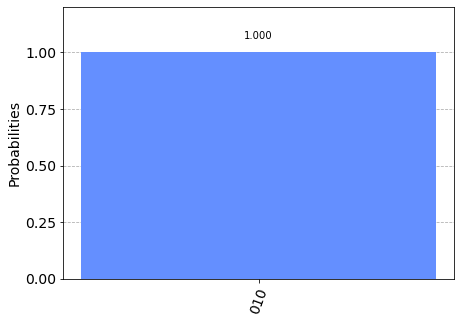

In [212]:
backend_plot = Aer.get_backend('qasm_simulator')
results = execute(qc, backend = backend_plot, shots = 1024).result()
plot_histogram(results.get_counts())

In [213]:
results.get_counts()

{'010': 1024}